https://www.kaggle.com/code/sagardubey3/admission-prediction-with-linear-regression/notebook

The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are :

GRE Scores ( out of 340 )
TOEFL Scores ( out of 120 )
University Rating ( out of 5 )
Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
Undergraduate GPA ( out of 10 )
Research Experience ( either 0 or 1 )
Chance of Admit ( ranging from 0 to 1 )

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
admissions = pd.read_csv('/content/Admission_Predict.csv')

In [ ]:
admissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
admissions.drop('Serial No.',inplace =True , axis=1)

In [ ]:
admissions.shape

(400, 8)

In [ ]:
admissions.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
admissions.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
admissions.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
admissions.corr(method="pearson")

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


[Text(0, 0, '181'), Text(0, 0, '219')]

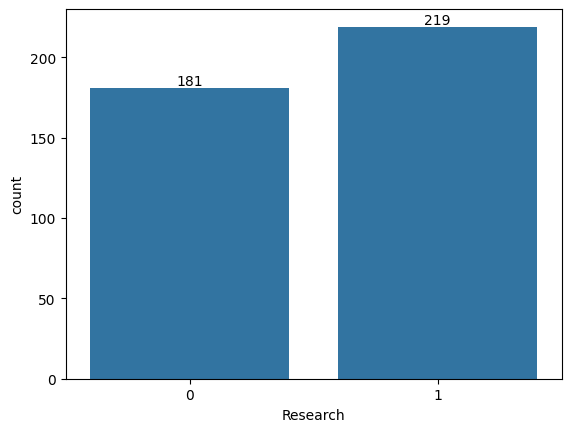

In [ ]:
ax = sns.countplot(x="Research", data=admissions)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Research', ylabel='Chance of Admit '>

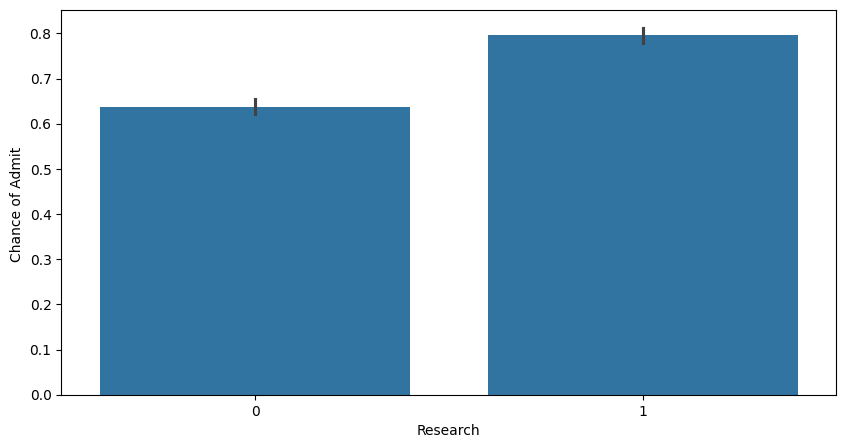

In [ ]:
plt.subplots(figsize=(10,5))
sns.barplot(x="Research",y="Chance of Admit ",data=admissions)

<Axes: xlabel='CGPA', ylabel='Chance of Admit '>

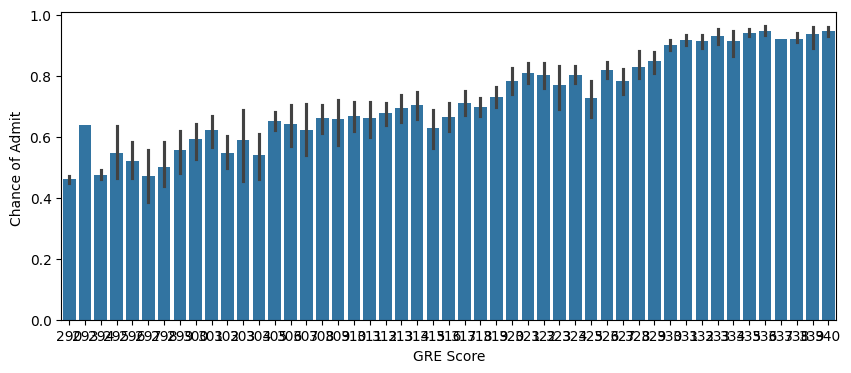

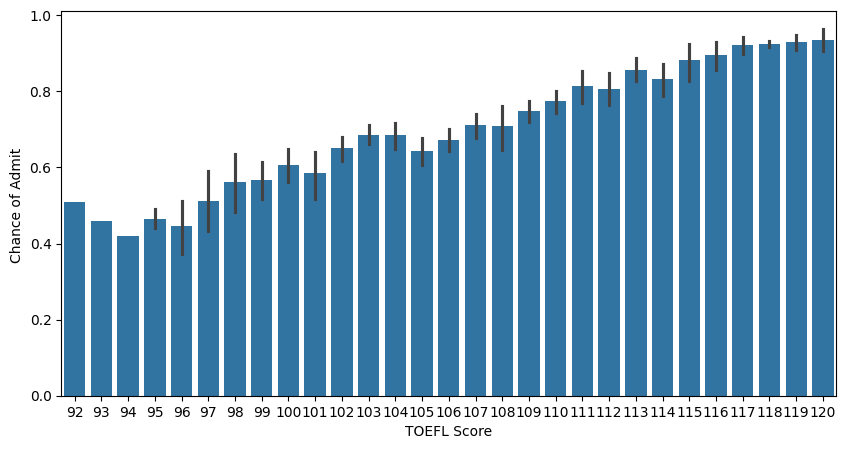

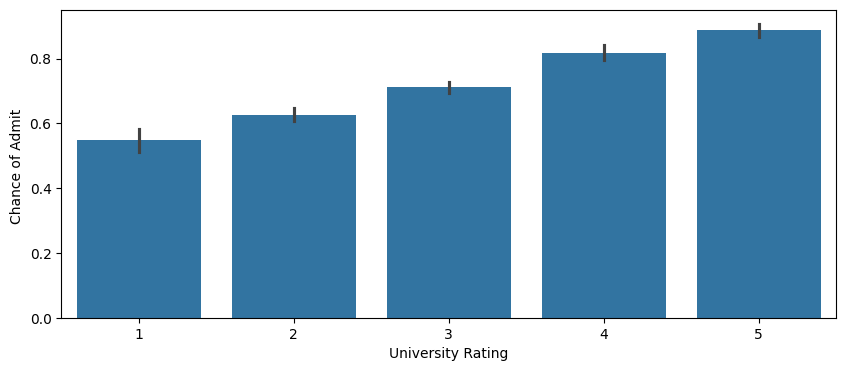

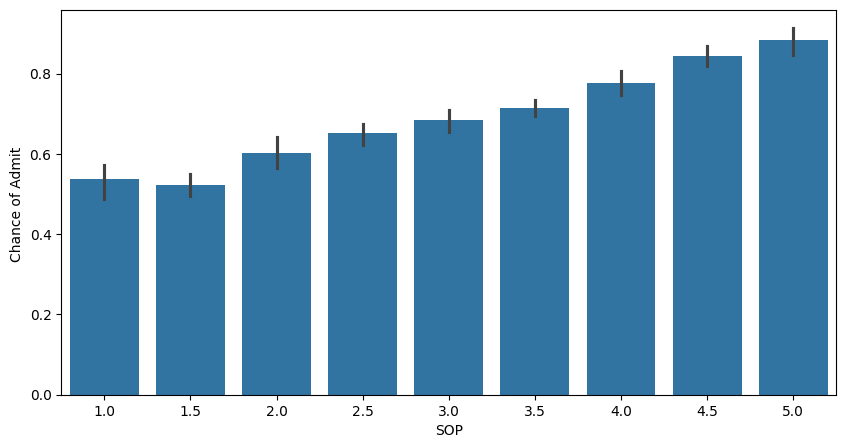

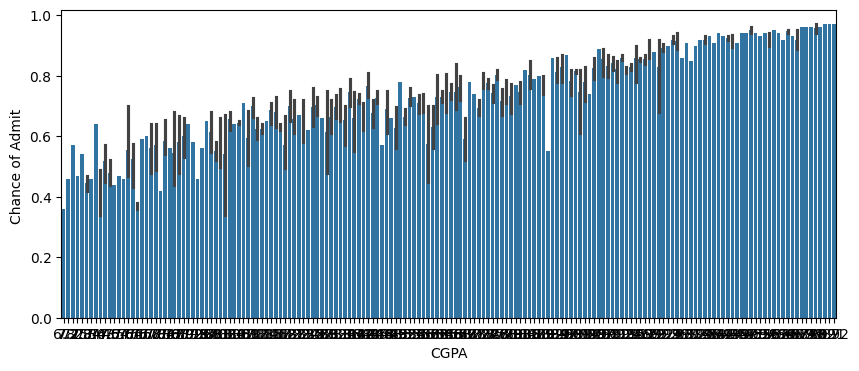

In [ ]:
plt.subplots(figsize=(10,4))
sns.barplot(x="GRE Score",y="Chance of Admit ",data=admissions)
plt.subplots(figsize=(10,5))
sns.barplot(x="TOEFL Score",y="Chance of Admit ",data=admissions)
plt.subplots(figsize=(10,4))
sns.barplot(x="University Rating",y="Chance of Admit ",data=admissions)
plt.subplots(figsize=(10,5))
sns.barplot(x="SOP",y="Chance of Admit ",data=admissions)
plt.subplots(figsize=(10,4))
sns.barplot(x="CGPA",y="Chance of Admit ",data=admissions)

<Axes: xlabel='GRE Score', ylabel='TOEFL Score'>

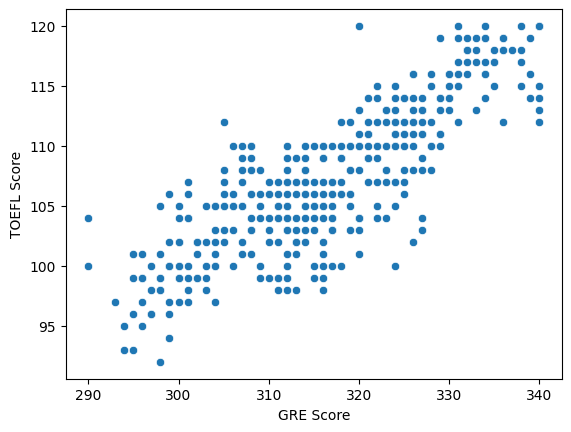

In [ ]:
sns.scatterplot(x="GRE Score",y="TOEFL Score",data=admissions)

<Axes: xlabel='GRE Score', ylabel='TOEFL Score'>

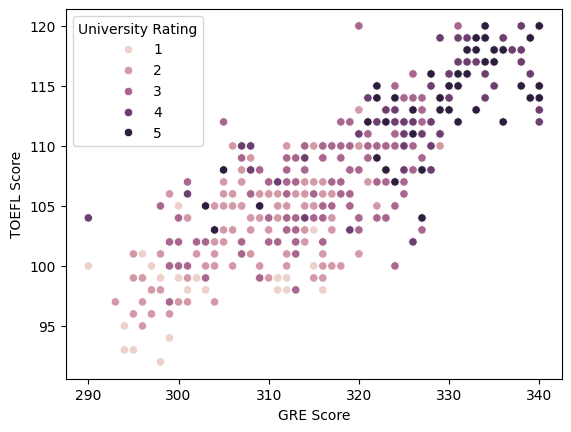

In [ ]:
sns.scatterplot(x="GRE Score",y="TOEFL Score",hue="University Rating",data=admissions)

<Axes: xlabel='TOEFL Score', ylabel='Count'>

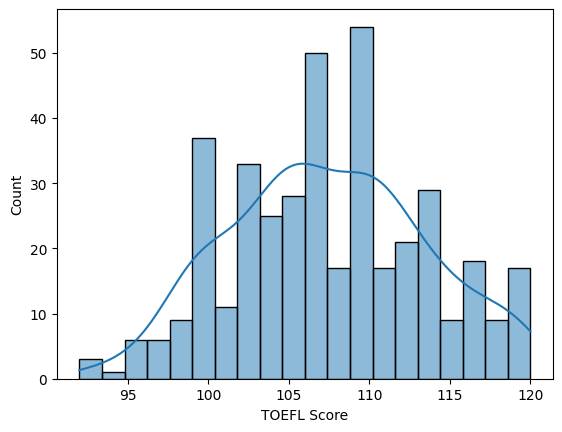

In [ ]:
sns.histplot(admissions['TOEFL Score'],bins=20,kde=True)

<Axes: xlabel='GRE Score', ylabel='Count'>

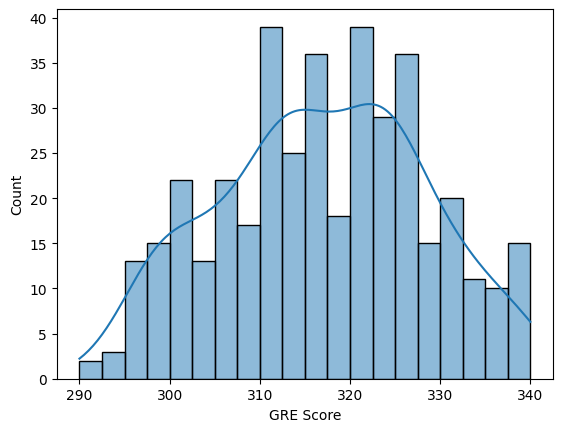

In [ ]:
sns.histplot(admissions['GRE Score'],bins=20,kde=True)

<Axes: >

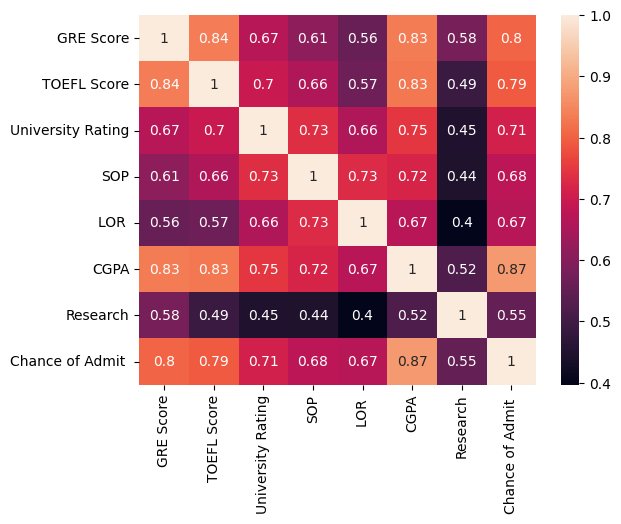

In [ ]:
sns.heatmap(admissions.corr(),annot=True)

In [ ]:
admissions.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

while checking the correlation , CGPA, GRE,TOFEL scores are highly related to chance of admit. So here we have multiple featuress to consider while going for prediction. W e use multiliner regression. If there is only one feature as independent variable , then we go for simple linear regression;

In [ ]:
y=admissions["Chance of Admit "]
X=admissions.drop(["Chance of Admit "],axis=1)

In [ ]:
X.shape

(400, 7)

In [ ]:
y.shape

(400,)

In [ ]:
y = np.array(y)
y = y.reshape(-1,1)
# y = np.array(y).reshape(-1, 1)

The StandardScaler and other similar transformers from scikit-learn expect the data to be in a two-dimensional array-like structure, where each row represents a sample and each column represents a feature.

When you’re scaling a target column (which is often a one-dimensional array or a Pandas Series), the scaler expects it to be two-dimensional. This is because even if you have a single feature (like the target variable in a regression problem), the scaler is designed to work with multiple features. So, when you pass a one-dimensional array, it interprets it as a single sample with multiple features, which is not the intended input.

To fix this, you need to reshape your one-dimensional array into a two-dimensional one with one column and as many rows as there are samples. This is done using the .reshape(-1, 1) method, where -1 tells numpy to automatically determine the number of rows based on the length of the array, and 1 sets the number of columns to one

In [ ]:
 y.shape

(400, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)
y= scaler.fit_transform(y)


MULTIPLE LINEAR REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(320, 7) (80, 7) (320, 1) (80, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
#Linear Regression
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)
y_pred=linear_model.predict(X_test)
# y_pred

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
print("R2 score of the model is ",r2_score(y_pred,y_test))
print("mean_absolute_error  of the model is ",mean_absolute_error(y_pred,y_test))
print("mean_squared_error  of the model is ",mean_squared_error(y_pred,y_test))
print("Accuracy of the model is ",linear_model.score(X_test,y_test))

R2 score of the model is  0.727000083331922
mean_absolute_error  of the model is  0.3367016177179793
mean_squared_error  of the model is  0.22758907347900395
Accuracy of the model is  0.8212082591486993


In [ ]:
# Getting the coefficients (weights) of the model
coefficients = linear_model.coef_
intercept = linear_model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[ 0.01307658  0.01912286  0.05179667 -0.00205533  0.11072201  0.80508594
   0.15605491]]
Intercept: [-13.72302618]


In the context of linear regression, the coefficients (coef_) represent the weights assigned to each feature in the model, indicating the strength and direction of the relationship between that feature and the target variable. The intercept (intercept_) is the value of the target variable when all the features are zero.

In the given code:

coefficients = model.coef_: This line retrieves the coefficients of the linear regression model fitted to the data. Each coefficient corresponds to a feature in the dataset (X).
intercept = model.intercept_: This line retrieves the intercept of the linear regression model. The intercept is the value of the target variable when all the features are zero.

SIMPLE LINEAR REGRESSION

In [ ]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [ ]:
# Selecting the feature (X) and the target variable (y)
X = admissions[['CGPA']]  # Using CGPA as the feature
y = admissions['Chance of Admit ']

# Fitting the simple linear regression model
model = LinearRegression().fit(X, y)

# Getting the coefficient (weight) and the intercept of the mode l
coefficient = model.coef_[0]
intercept = model.intercept_

print("Coefficient:", coefficient)
print("Intercept:", intercept)

Coefficient: 0.2088472295006913
Intercept: -1.0715116629342316


Coefficient (0.2088): This represents the estimated change in the dependent variable (Chance of Admit) for a one-unit change in the independent variable (CGPA), holding all other variables constant. In this case, it means that for every one-unit increase in CGPA, the Chance of Admit is estimated to increase by approximately 0.2088, assuming all other factors remain constant.
Intercept (-1.0715): This is the estimated value of the dependent variable (Chance of Admit) when the independent variable (CGPA) is zero. However, since CGPA cannot be zero in this context, the intercept is not directly interpretable in the same way as the coefficient. It is used to anchor the regression line, determining where it intersects the y-axis.
In summary, the coefficient tells you how much the dependent variable is expected to change when the independent variable changes by one unit, while the intercept provides the starting point of the regression line.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [ ]:
print("R2 score of the model is ",r2_score(y_pred,y_pred_dt))
print("mean_absolute_error  of the model is ",mean_absolute_error(y_pred,y_pred_dt))
print("mean_squared_error  of the model is ",mean_squared_error(y_pred,y_pred_dt))
print("Accuracy of the model is ",dt_model.score(X_test,y_test))

R2 score of the model is  0.6904001107048952
mean_absolute_error  of the model is  0.3515649815392579
mean_squared_error  of the model is  0.2581010016920426
Accuracy of the model is  0.6394253023092584


https://tanwirkhan.medium.com/predicting-graduate-admissions-using-linear-regression-bab05b6988b5